# Survival Analysis :  Quick Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from lifelines.plotting import plot_lifetimes      # Lifeline package for the Survival Analysis
%pylab inline
figsize(12,6)

Populating the interactive namespace from numpy and matplotlib


C:\Users\bugpi\Anaconda3\envs\nlp\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Real World Example 

### We will be using Telco Customer Churn data from Kaggle
https://www.kaggle.com/blastchar/telco-customer-churn/

In [2]:
##  create a dataframe
df =  pd.read_csv("./Data/latestdata.csv")

C:\Users\bugpi\Anaconda3\envs\nlp\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,2,9,10,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
## Have a first look at the data
df.head() 

,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,...,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
0,000-1-1,NaN,male,Shek Lei,Hong Kong,China,22.365019,114.133808,point,NaN,...,NaN,NaN,Shek Lei,NaN,NaN,Hong Kong,China,8029.0,NaN,NaN
1,000-1-10,78,male,Vo Euganeo,Veneto,Italy,45.297748,11.658382,point,NaN,...,22.02.2020,NaN,Vo' Euganeo,NaN,NaN,Veneto,Italy,8954.0,NaN,NaN
2,000-1-100,61,female,NaN,NaN,Singapore,1.353460,103.815100,admin0,NaN,...,17.02.2020,NaN,NaN,NaN,NaN,NaN,Singapore,200.0,NaN,NaN
3,000-1-1000,NaN,NaN,Zhengzhou City,Henan,China,34.629310,113.468000,admin2,NaN,...,NaN,NaN,NaN,NaN,Zhengzhou City,Henan,China,10091.0,NaN,NaN
4,000-1-10000,NaN,NaN,Pingxiang City,Jiangxi,China,27.513560,113.902900,admin2,NaN,...,NaN,NaN,NaN,NaN,Pingxiang City,Jiangxi,China,7060.0,NaN,NaN


In [4]:
## Data Types and Missing Values in Columns
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676311 entries, 0 to 2676310
Data columns (total 33 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ID                        object 
 1   age                       object 
 2   sex                       object 
 3   city                      object 
 4   province                  object 
 5   country                   object 
 6   latitude                  float64
 7   longitude                 float64
 8   geo_resolution            object 
 9   date_onset_symptoms       object 
 10  date_admission_hospital   object 
 11  date_confirmation         object 
 12  symptoms                  object 
 13  lives_in_Wuhan            object 
 14  travel_history_dates      object 
 15  travel_history_location   object 
 16  reported_market_exposure  object 
 17  additional_information    object 
 18  chronic_disease_binary    bool   
 19  chronic_disease           object 
 20  source                  

In [5]:
filtered = df[['date_confirmation','date_death_or_discharge','outcome','chronic_disease_binary',"chronic_disease"]].dropna()
filtered

,date_confirmation,date_death_or_discharge,outcome,chronic_disease_binary,chronic_disease
1112,21.02.2020,23.02.2020,death,False,"Iran; Kuala Lumpur, Federal Territory of Kuala..."
4334,25.01.2020,31.01.2020,discharged,True,hypertension
5779,02.02.2020,14.02.2020,discharged,True,COPD
8889,11.03.2020,11.03.2020,death,True,"diabetes, hypertension"
14442,01.02.2020,01.02.2020,died,True,"""thought to have had other pre-existing condit..."
...,...,...,...,...,...
410187,01.02.2020,01.02.2020,died,True,"""thought to have had other pre-existing condit..."
413029,02.02.2020,14.02.2020,discharged,True,COPD
445518,23.01.2020,12.02.2020,discharge,True,"history of hypertension, type 2 diabetes, coro..."
583617,11.03.2020,11.03.2020,death,True,"diabetes, hypertension"


In [9]:
filtered_ = df[['date_confirmation','date_death_or_discharge','outcome','chronic_disease_binary']].dropna()
length = len(filtered_)
filtered_.index = list(range(length))
for idx in range(length):
    binary = filtered_.loc[idx,['chronic_disease_binary']][0]
    if binary ==True:
        filtered_.loc[idx,['chronic_disease_binary']] = 1
    else:
        filtered_.loc[idx,['chronic_disease_binary']] = 0
filtered_

,date_confirmation,date_death_or_discharge,outcome,chronic_disease_binary
0,21.02.2020,22.02.2020,death,0
1,14.02.2020,17.02.2020,discharge,0
2,14.02.2020,20.02.2020,discharge,0
3,14.02.2020,02.03.2020,discharge,0
4,14.02.2020,29.02.2020,discharge,0
...,...,...,...,...
1147,31.01.2020,19.02.2020,recovered,0
1148,03.03.2020,26.02.2020,death,0
1149,01.03.2020,01.03.2020,death,0
1150,18.03.2020,19.03.2020,death,0


## Chronic disease

In [10]:
sym_dict = filtered["chronic_disease"].value_counts().to_dict()

In [11]:
del sym_dict['"thought to have had other pre-existing conditions"']
del sym_dict['Iran; Kuala Lumpur, Federal Territory of Kuala Lumpur, Malaysia']

In [12]:
sym_dict

{'hypertension': 16,
 'hypertension:diabetes': 10,
 'diabetes:hypertension': 6,
 'diabetes': 5,
 'hypertension:chronic kidney disease': 3,
 'chronic kidney disease': 3,
 'hypertensive': 3,
 'asthma': 3,
 'chronic obstructive pulmonary disease': 2,
 'diabetes, hypertension': 2,
 'hypertension:diabetes:chronic kidney disease': 2,
 'prostate hypertrophy': 2,
 'hypertension:cardiac disease': 2,
 'hepatitis B, diabetes': 2,
 'chronic kidney disease:hypertension:diabetes': 2,
 'COPD': 2,
 'history of hypertension, type 2 diabetes, coronary heart disease for which a stent had been implanted, and lung cancer': 2,
 'asthma:diabetes': 1,
 'hypertension, diabetes, coronary heart disease, frequent ventricular premature beat (FVPB), coronary artery stenting': 1,
 'hypertension:diabetes:dyslipidemia': 1,
 'hypertension:diabetes:dislipidemia': 1,
 'hypertension:cerebrovascular accident infarct': 1,
 'cardiac disease': 1,
 'asthma:hypertension:atherosclerosis:coronary artery disease': 1,
 'diabetes:hy

In [13]:
import re
symptoms = []
for kys in sym_dict.keys():
    keys = re.split(':|,|;',kys)
    for k in keys:
        if k[0]==' ':
            symptoms.append(k[1:])
        else:
            symptoms.append(k)

In [14]:
symptoms = set(symptoms)
symptoms

{'COPD',
 'Chronic kidney disease',
 'Diabetes',
 'Hypertension',
 "Parkinson's disease",
 'Pre-renal azotemia',
 'and lung cancer',
 'asthma',
 'atherosclerosis',
 'atrial fibrillation',
 'benign prostatic hyperplasia',
 'benign prostatic hypertrophy',
 'bronchial asthma',
 'cardiac disease',
 'cardiac dysrhythmia',
 'cardiomyopathy',
 'cardiovascular disease',
 'cerebrovascular accident infarct',
 'cerebrovascular infarct',
 'chronic kidney disease',
 'chronic obstructive pulmonary disease',
 'colon cancer',
 'coronary artery disease',
 'coronary artery stenting',
 'coronary heart disease',
 'coronary heart disease for which a stent had been implanted',
 'diabetes',
 'diabetes for more than 20 years',
 'dislipidemia',
 'dyslipidemia',
 'frequent ventricular premature beat (FVPB)',
 'hepatitis B',
 'history of hypertension',
 'hypertension',
 'hypertension for more than 20 years',
 'hypertensive',
 'hypertenstion',
 'hyperthyroidism',
 'hypothyroidism',
 'impaired fasting glucose',
 '

In [15]:
ss = []
for s in symptoms:
    if 'iabete' in s:
        ss.append('diabetes')
    elif 'yperte' in s:
        ss.append('hypertension')
    else:
        ss.append(s)

In [16]:
symptoms = set(ss)
symptoms

{'COPD',
 'Chronic kidney disease',
 "Parkinson's disease",
 'Pre-renal azotemia',
 'and lung cancer',
 'asthma',
 'atherosclerosis',
 'atrial fibrillation',
 'benign prostatic hyperplasia',
 'benign prostatic hypertrophy',
 'bronchial asthma',
 'cardiac disease',
 'cardiac dysrhythmia',
 'cardiomyopathy',
 'cardiovascular disease',
 'cerebrovascular accident infarct',
 'cerebrovascular infarct',
 'chronic kidney disease',
 'chronic obstructive pulmonary disease',
 'colon cancer',
 'coronary artery disease',
 'coronary artery stenting',
 'coronary heart disease',
 'coronary heart disease for which a stent had been implanted',
 'diabetes',
 'dislipidemia',
 'dyslipidemia',
 'frequent ventricular premature beat (FVPB)',
 'hepatitis B',
 'hypertension',
 'hyperthyroidism',
 'hypothyroidism',
 'impaired fasting glucose',
 'ischemic heart disease',
 'pre-renal azotemia',
 'prostate cancer',
 'prostate hypertrophy',
 'renal disease',
 'tongue cancer',
 'upper git bleeding',
 'valvular heart 

In [17]:
for s in symptoms:
    filtered[s]=np.zeros(len(filtered))

In [18]:
filtered

,date_confirmation,date_death_or_discharge,outcome,chronic_disease_binary,chronic_disease,diabetes,hypertension,COPD,chronic kidney disease,dislipidemia,...,asthma,prostate cancer,Chronic kidney disease,coronary heart disease,benign prostatic hyperplasia,colon cancer,dyslipidemia,impaired fasting glucose,atherosclerosis,valvular heart disease
1112,21.02.2020,23.02.2020,death,False,"Iran; Kuala Lumpur, Federal Territory of Kuala...",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4334,25.01.2020,31.01.2020,discharged,True,hypertension,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5779,02.02.2020,14.02.2020,discharged,True,COPD,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8889,11.03.2020,11.03.2020,death,True,"diabetes, hypertension",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14442,01.02.2020,01.02.2020,died,True,"""thought to have had other pre-existing condit...",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410187,01.02.2020,01.02.2020,died,True,"""thought to have had other pre-existing condit...",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
413029,02.02.2020,14.02.2020,discharged,True,COPD,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
445518,23.01.2020,12.02.2020,discharge,True,"history of hypertension, type 2 diabetes, coro...",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
583617,11.03.2020,11.03.2020,death,True,"diabetes, hypertension",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
length = len(filtered)
filtered.index = list(range(length))

for idx in range(length):
    sym = filtered.loc[idx,['chronic_disease']][0]
    sym = re.split(':|,|;',sym)
    for s in sym:
        if s in symptoms:
            filtered.loc[idx,[s]]=1
        elif 'iabete' in s:
            filtered.loc[idx,['diabetes']]=1
        elif 'yperte' in s:
            filtered.loc[idx,['hypertension']]=1
        else:
            pass

In [20]:
filtered.loc[1].to_dict()

{'date_confirmation': '25.01.2020',
 'date_death_or_discharge': '31.01.2020',
 'outcome': 'discharged',
 'chronic_disease_binary': True,
 'chronic_disease': 'hypertension',
 'diabetes': 0.0,
 'hypertension': 1.0,
 'COPD': 0.0,
 'chronic kidney disease': 0.0,
 'dislipidemia': 0.0,
 'cardiac disease': 0.0,
 'cardiac dysrhythmia': 0.0,
 'hepatitis B': 0.0,
 'Pre-renal azotemia': 0.0,
 'pre-renal azotemia': 0.0,
 'prostate hypertrophy': 0.0,
 'coronary artery disease': 0.0,
 'cerebrovascular infarct': 0.0,
 'upper git bleeding': 0.0,
 'coronary artery stenting': 0.0,
 'ischemic heart disease': 0.0,
 'benign prostatic hypertrophy': 0.0,
 'atrial fibrillation': 0.0,
 'tongue cancer': 0.0,
 'renal disease': 0.0,
 "Parkinson's disease": 0.0,
 'cardiovascular disease': 0.0,
 'cerebrovascular accident infarct': 0.0,
 'chronic obstructive pulmonary disease': 0.0,
 'cardiomyopathy': 0.0,
 'hyperthyroidism': 0.0,
 'coronary heart disease for which a stent had been implanted': 0.0,
 'frequent ventri

## data 관련

In [21]:
filtered['outcome']=filtered['outcome'].apply(lambda x: 1 if x == 'died' or x == 'death' or  x == 'dead' or x == 'Deceased' or x == 'Died' or x == 'Death' or x == 'Dead'else 0 )

In [22]:
filtered["outcome"].value_counts()

1    84
0    19
Name: outcome, dtype: int64

In [23]:
d,m,y = filtered.loc[1,['date_confirmation']][0].split('.')

In [24]:
from datetime import datetime

In [25]:
length = len(filtered)
filtered.index = list(range(length))

In [26]:
filtered

,date_confirmation,date_death_or_discharge,outcome,chronic_disease_binary,chronic_disease,diabetes,hypertension,COPD,chronic kidney disease,dislipidemia,...,asthma,prostate cancer,Chronic kidney disease,coronary heart disease,benign prostatic hyperplasia,colon cancer,dyslipidemia,impaired fasting glucose,atherosclerosis,valvular heart disease
0,21.02.2020,23.02.2020,1,False,"Iran; Kuala Lumpur, Federal Territory of Kuala...",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25.01.2020,31.01.2020,0,True,hypertension,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02.02.2020,14.02.2020,0,True,COPD,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11.03.2020,11.03.2020,1,True,"diabetes, hypertension",1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,01.02.2020,01.02.2020,1,True,"""thought to have had other pre-existing condit...",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,01.02.2020,01.02.2020,1,True,"""thought to have had other pre-existing condit...",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,02.02.2020,14.02.2020,0,True,COPD,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,23.01.2020,12.02.2020,0,True,"history of hypertension, type 2 diabetes, coro...",1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,11.03.2020,11.03.2020,1,True,"diabetes, hypertension",1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
from datetime import datetime

days = []
for idx in range(length):
  conf = filtered.loc[idx,['date_confirmation']][0]
  if '-' in conf:
    a,b,c = conf.split(" - ")[0].split('.')
  else:
    a,b,c = conf.split('.')
  dead = filtered.loc[idx,['date_death_or_discharge']][0]
  if '-' in dead:
    x,y,z = dead.split(" - ")[0].split('.')
  else:
    x,y,z = dead.split('.')

  if int(y) > 12:
    t = x
    x=y
    y=t
  if int(b) > 12:
    t = a
    a=b
    b=t

  death = datetime(int(z),int(y),int(x),0,0,0)
  confirm = datetime(int(c),int(b),int(a),0,0,0)
  days.append((death-confirm).days)


In [28]:
filtered["days"] = days

In [29]:
filtered2 = filtered[filtered["days"]<0]
filtered2

,date_confirmation,date_death_or_discharge,outcome,chronic_disease_binary,chronic_disease,diabetes,hypertension,COPD,chronic kidney disease,dislipidemia,...,prostate cancer,Chronic kidney disease,coronary heart disease,benign prostatic hyperplasia,colon cancer,dyslipidemia,impaired fasting glucose,atherosclerosis,valvular heart disease,days
31,13.03.2020,11.03.2020,1,True,diabetes:hypertension:chronic kidney disease,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2
42,18.03.2020,17.03.2020,1,True,diabetes,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
43,19.03.2020,12.03.2020,1,True,diabetes:hypertension,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7
44,19.03.2020,18.03.2020,1,True,diabetes:hypertension,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
46,20.03.2020,16.03.2020,1,True,diabetes:hypertension,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4
47,21.03.2020,14.03.2020,1,True,diabetes,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7
48,21.03.2020,20.03.2020,1,True,Pre-renal azotemia:cardiomyopathy:hypertension...,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
49,21.03.2020,19.03.2020,1,True,hypertension:diabetes:asthma,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2
51,21.03.2020,16.03.2020,1,True,chronic kidney disease:hypertension:diabetes:i...,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5
52,21.03.2020,19.03.2020,1,True,pre-renal azotemia:diabetes:hypertension,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2


In [30]:
for idx in range(length):
  d = int(filtered.loc[idx,['days']][0])
  if d < 0:
    conf = filtered.loc[idx,['date_confirmation']][0]
    if '-' in conf:
      a,b,c = conf.split(" - ")[0].split('.')
    else:
      a,b,c = conf.split('.')
    dead = filtered.loc[idx,['date_death_or_discharge']][0]
    if '-' in dead:
      x,y,z = dead.split(" - ")[0].split('.')
    else:
      x,y,z = dead.split('.')

    try:
      death = datetime(int(z),int(x),int(y),0,0,0)
      confirm = datetime(int(c),int(a),int(b),0,0,0)
      filtered.loc[idx,['days']] = -(death-confirm).days
    except:
      filtered.loc[idx,['days']] = None
  else:
    pass


In [31]:
filtered = filtered.dropna()
filtered

,date_confirmation,date_death_or_discharge,outcome,chronic_disease_binary,chronic_disease,diabetes,hypertension,COPD,chronic kidney disease,dislipidemia,...,prostate cancer,Chronic kidney disease,coronary heart disease,benign prostatic hyperplasia,colon cancer,dyslipidemia,impaired fasting glucose,atherosclerosis,valvular heart disease,days
0,21.02.2020,23.02.2020,1,False,"Iran; Kuala Lumpur, Federal Territory of Kuala...",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,25.01.2020,31.01.2020,0,True,hypertension,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
2,02.02.2020,14.02.2020,0,True,COPD,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
3,11.03.2020,11.03.2020,1,True,"diabetes, hypertension",1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,01.02.2020,01.02.2020,1,True,"""thought to have had other pre-existing condit...",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,01.02.2020,01.02.2020,1,True,"""thought to have had other pre-existing condit...",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,02.02.2020,14.02.2020,0,True,COPD,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
100,23.01.2020,12.02.2020,0,True,"history of hypertension, type 2 diabetes, coro...",1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
101,11.03.2020,11.03.2020,1,True,"diabetes, hypertension",1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## hr

<AxesSubplot:xlabel='timeline'>

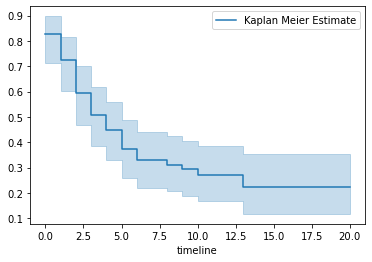

In [32]:
## Lets create an overall KaplanMeier curve, without breaking it into groups of covariates.

## Import the library
from lifelines import KaplanMeierFitter


durations = filtered['days'] ## Time to event data of censored and event data
event_observed = filtered['outcome']  ## It has the churned (1) and censored is (0)

## create a kmf object as km
km = KaplanMeierFitter() ## instantiate the class to create an object

## Fit the data into the model
km.fit(durations, event_observed,label='Kaplan Meier Estimate')

## Create an estimate
km.plot()

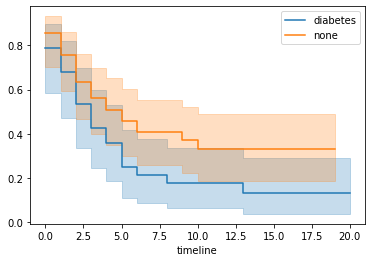

In [33]:
kmf = KaplanMeierFitter() 


T = filtered['days']     ## time to event
E = filtered['outcome']      ## event occurred or censored


groups = filtered['diabetes']             ## Create the cohorts from the 'Contract' column
ix1 = (groups == 1)   ## Cohort 1
ix2 = (groups == 0)         ## Cohort 2


kmf.fit(T[ix1], E[ix1], label='diabetes')    ## fit the cohort 1 data
ax = kmf.plot()


kmf.fit(T[ix2], E[ix2], label='none')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax)


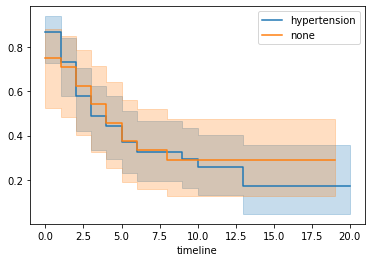

In [34]:
kmf = KaplanMeierFitter() 


T = filtered['days']     ## time to event
E = filtered['outcome']      ## event occurred or censored


groups = filtered['hypertension']             ## Create the cohorts from the 'Contract' column
ix1 = (groups == 1)   ## Cohort 1
ix2 = (groups == 0)         ## Cohort 2


kmf.fit(T[ix1], E[ix1], label='hypertension')    ## fit the cohort 1 data
ax = kmf.plot()


kmf.fit(T[ix2], E[ix2], label='none')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax)

## Cox Proportional Hazard Model (Survival Regression)

In [35]:
from lifelines import CoxPHFitter 

In [36]:
## My objective here is to introduce you to the implementation of the model.Thus taking subset of the columns to train the model.
## Only using the subset of the columns present in the original data
df_r= filtered.loc[:,['outcome','diabetes','hypertension','days']]
df_r.head() ## have a look at the data 

,outcome,diabetes,hypertension,days
0,1,0.0,0.0,2.0
1,0,0.0,1.0,6.0
2,0,0.0,0.0,12.0
3,1,1.0,1.0,0.0
4,1,0.0,0.0,0.0


In [37]:
## Create dummy variables
df_dummy = pd.get_dummies(df_r, drop_first=True)
df_dummy.head()

,outcome,diabetes,hypertension,days
0,1,0.0,0.0,2.0
1,0,0.0,1.0,6.0
2,0,0.0,0.0,12.0
3,1,1.0,1.0,0.0
4,1,0.0,0.0,0.0


In [38]:
# Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Instantiate the class to create a cph object
cph.fit(df_dummy, 'days', event_col='outcome')   ## Fit the data to train the model
cph.print_summary()    ## HAve a look at the significance of the features

<lifelines.CoxPHFitter: fitted with 69 total observations, 19 right-censored observations>
             duration col = 'days'
                event col = 'outcome'
      baseline estimation = breslow
   number of observations = 69
number of events observed = 50
   partial log-likelihood = -182.90
         time fit was run = 2021-01-19 10:37:29 UTC

---
               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                            
diabetes       0.48       1.61       0.29            -0.08             1.04                 0.92                 2.83
hypertension   0.01       1.01       0.30            -0.58             0.60                 0.56                 1.81

                z    p   -log2(p)
covariate                        
diabetes     1.67 0.10       3.38
hypertension 0.02 0.98       0.02
---
Concordance = 0.55
Partial AIC = 369.80
log-likelihood ratio test = 2.78 on 2 df
-log2(p) of ll-ratio test = 2.00

<AxesSubplot:xlabel='log(HR) (95% CI)'>

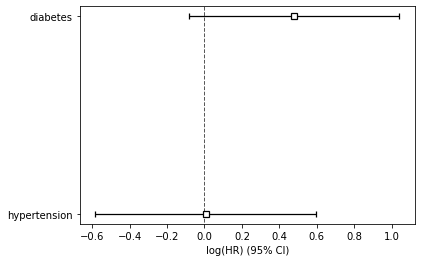

In [39]:
cph.plot()

In [46]:
tr_rows = df_dummy.iloc[15:18, 1:]
tr_rows

,diabetes,hypertension,days
15,1.0,0.0,15.0
16,0.0,0.0,6.0
17,0.0,1.0,10.0


<AxesSubplot:>

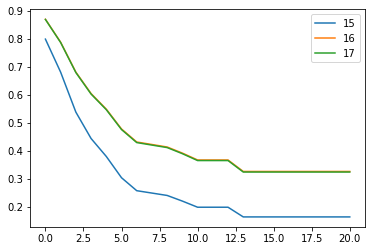

In [47]:
cph.predict_survival_function(tr_rows).plot()